### Stats 101C HW 3

##### Bryan Mui UID 506021334

In [61]:
# imports
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn import tree # type: ignore
import matplotlib # type: ignore
from matplotlib.pyplot import figure # type: ignore

In [62]:
df = pd.read_csv('BankNote_Authentication.csv')
print(df.head())
print(df.shape)

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
(1372, 5)


In [63]:
# separate the response and predictor variables
x = df[['variance', 'skewness', 'curtosis', 'entropy']] 
y = df['class'] 
print(x.head())
print(y.head())

   variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


### (1) Split the dataset into Training (70%) and Testing (30%)

In [64]:
# split the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 4)
(412, 4)
(960,)
(412,)


In [65]:
# Check the dimensions of the split
print(1372 * 0.3) # 411.59999999999997, therefore we have splitted the dataset into 70:30

print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

411.59999999999997
      variance  skewness  curtosis  entropy
1117   -1.9881   0.99945 -0.285620 -0.70044
128     4.6689   1.30980  0.055404  1.90900
753     3.1541  -5.17110  6.599100  0.57455
219    -1.3000  10.26780 -2.953000 -5.86380
572     5.5040  10.36710 -4.413000 -4.02110
      variance  skewness  curtosis  entropy
634    6.82480    5.2187  -2.54250  0.54610
928   -6.15360    7.9295   0.61663 -3.26460
390   -0.36279    8.2895  -1.92130 -3.33320
1320  -0.72068   -6.7583   5.84080  0.62369
812   -2.06590    1.0512  -0.46298 -1.09740
1117    1
128     0
753     0
219     0
572     0
Name: class, dtype: int64
634     0
928     1
390     0
1320    1
812     1
Name: class, dtype: int64


### (2) Fit a decision tree with maximum depth =5, and test the fitted model on Testing Dataset

In [66]:
# Fit a decision tree with maximum depth 5

dtree = tree.DecisionTreeClassifier(max_depth=5)
dtree = dtree.fit(x_train, y_train)

# test the model on the test dataset
from sklearn.metrics import accuracy_score # type: ignore

y_pred = dtree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Calculated Accuracy of Tree: {accuracy}")

Calculated Accuracy of Tree: 0.970873786407767


[Text(0.546875, 0.9166666666666666, 'x[0] <= 0.32\ngini = 0.492\nsamples = 960\nvalue = [540, 420]'),
 Text(0.3671875, 0.75, 'x[1] <= 5.865\ngini = 0.317\nsamples = 466\nvalue = [92, 374]'),
 Text(0.45703125, 0.8333333333333333, 'True  '),
 Text(0.234375, 0.5833333333333334, 'x[2] <= 6.219\ngini = 0.088\nsamples = 370\nvalue = [17, 353]'),
 Text(0.125, 0.4166666666666667, 'x[1] <= 4.094\ngini = 0.015\nsamples = 258\nvalue = [2, 256]'),
 Text(0.0625, 0.25, 'x[2] <= 4.878\ngini = 0.008\nsamples = 248\nvalue = [1, 247]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.0\nsamples = 227\nvalue = [0, 227]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.1875, 0.25, 'x[2] <= 1.831\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.34375, 0.4166666666666667, 'x[1] <= -3.207\ngini = 0.232\n

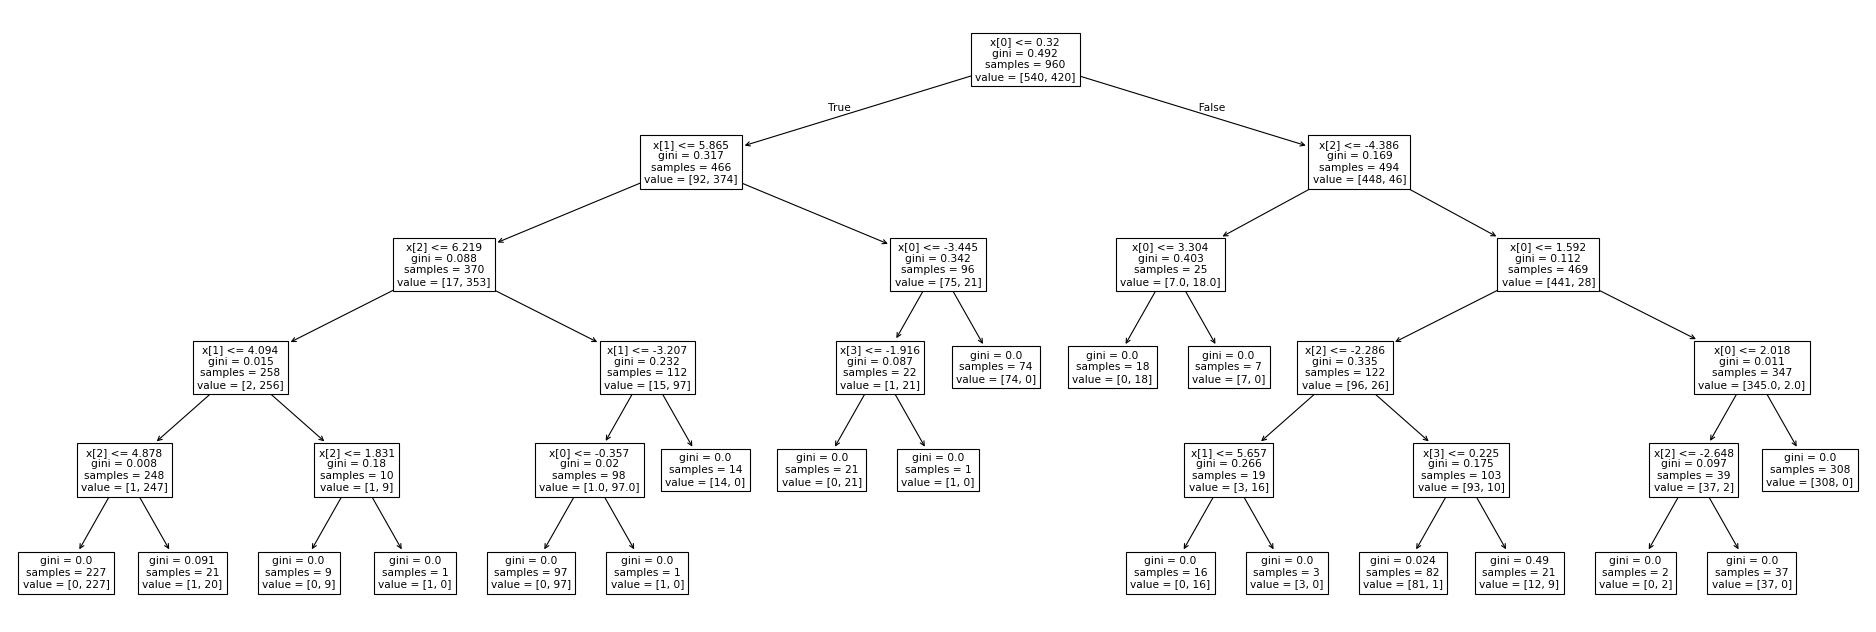

In [67]:
# plot the tree
figure(figsize=(30, 10), dpi=80)
tree.plot_tree(dtree)

### (3) Fit a Random forest model based on Training with 51 classifiers (maximum depth =5) and report the test error

In [68]:
from sklearn.ensemble import RandomForestClassifier # type: ignore

# fit the random forest classifier
rf = RandomForestClassifier(max_depth=5, n_estimators=51)
rf = rf.fit(x_train, y_train)

# test the model on the test dataset
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Calculated Accuracy of Random Forest: {accuracy}")

Calculated Accuracy of Random Forest: 0.9927184466019418


### (4) Fit a Boosting model based on Training with 51 classifiers (maximum depth =5) and report the test error

In [69]:
import xgboost as xgb # type: ignore

xgb_class = xgb.XGBClassifier(max_depth=5, n_estimators=51, learning_rate=1, early_stopping_rounds=2)
xgb_class.fit(x_train, y_train, eval_set=[(x_test, y_test)])

y_pred = xgb_class.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Calculated Accuracy of XGBoost: {accuracy}")

[0]	validation_0-logloss:0.18456
[1]	validation_0-logloss:0.09035
[2]	validation_0-logloss:0.05305
[3]	validation_0-logloss:0.03697
[4]	validation_0-logloss:0.03077
[5]	validation_0-logloss:0.02844
[6]	validation_0-logloss:0.02537
[7]	validation_0-logloss:0.02043
[8]	validation_0-logloss:0.01869
[9]	validation_0-logloss:0.01730
[10]	validation_0-logloss:0.01569
[11]	validation_0-logloss:0.01558
[12]	validation_0-logloss:0.01488
[13]	validation_0-logloss:0.01370
[14]	validation_0-logloss:0.01317
[15]	validation_0-logloss:0.01267
[16]	validation_0-logloss:0.01239
[17]	validation_0-logloss:0.01229
[18]	validation_0-logloss:0.01200
[19]	validation_0-logloss:0.01190
[20]	validation_0-logloss:0.01146
[21]	validation_0-logloss:0.01128
[22]	validation_0-logloss:0.01108
[23]	validation_0-logloss:0.01087
[24]	validation_0-logloss:0.01067
[25]	validation_0-logloss:0.01053
[26]	validation_0-logloss:0.01039
[27]	validation_0-logloss:0.01036
[28]	validation_0-logloss:0.01012
[29]	validation_0-loglos

### Compare the testing error of RF and Boosting to that of decision tree.




In [70]:
# DTree error : 0.029126213592232997
print(1 - 0.970873786407767)

# Random forest error : 0.009708737864077666

print(1 - 0.9902912621359223)

# XG Boost error: 0 because 100% accuracy

0.029126213592232997
0.009708737864077666


The accuracy of the decision tree was 0.970873786407767, while random forest and xgboost were 0.9902912621359223 and 1.0, respectively. We can see that for this dataset the testing error would be 1 - calculated accuracy, which would make the decision tree error 0.029126213592232997, random forest 0.009708737864077666, and xgboost 0. To convert the error values to percent error we can multiply by 100. We see that the decision tree has the highest error, with value approximately 2.91%. Both the random forest and xgboost classifiers had lower testing error. This is because random forest creates and ensemble of trees to increase accuracy, and XGboost iterates through the testing data and create a better fit model. One thing to note is that XGboost is basically cheating because it has already seen the testing data in the model, in practice we would create a different split like 60% - 20% - 20% into training, testing, and validation data to prevent over-fitting.